### Introduction
The MNIST dataset is a well-known benchmark dataset in the field of machine learning, specifically in the area of computer vision. It consists of a collection of 70,000 grayscale images of handwritten digits, each of which is 28 pixels by 28 pixels in size. The goal of the dataset is to recognize the digit that is represented by each image.

The MNIST dataset has been used extensively in the machine learning community as a benchmark for evaluating various algorithms and techniques for digit recognition. Many different approaches have been proposed and tested on the dataset, including neural networks, decision trees, and support vector machines.

In this notebook, we will be using TensorFlow to train a deep neural network to recognize digits in the MNIST dataset. We will start by loading the dataset, preprocessing the images, and then training the neural network using a convolutional neural network (CNN) architecture. We will then evaluate the performance of the model on the test set and visualize some of its predictions.

Let's get started!

In [1]:
# import important libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('Number of images in train: ',X_train.shape[0])
print('Number of images in test: ',X_test.shape[0])
print('shape of image is: ',X_train.shape)

Number of images in train:  60000
Number of images in test:  10000
shape of image is:  (60000, 28, 28)


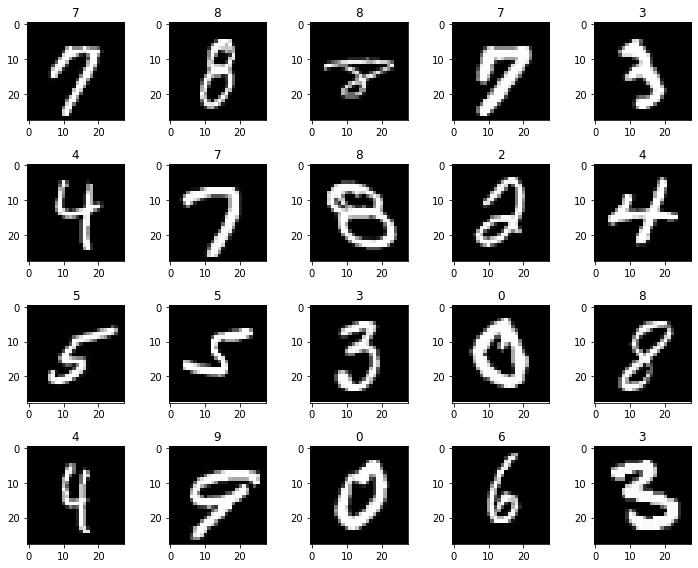

In [4]:
# show 20 random images
idx = np.random.choice(len(X_train), size=20, replace=False)

# Create a subplot grid
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.ravel()

# Plot the images
for i, ax in enumerate(axes):
    ax.imshow(X_train[idx[i]], cmap='gray')
    ax.set_title(y_train[idx[i]])
plt.tight_layout()
plt.show()

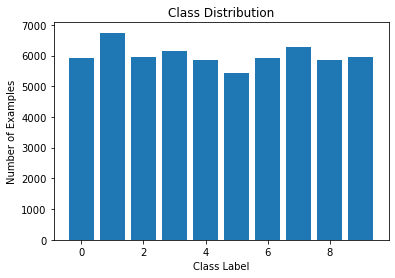

In [5]:
# Count the number of occurrences of each class label
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Create a bar chart of the class distribution
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Number of Examples")
plt.show()

In [6]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"X_train shape: {X_train.shape}")
print(f"test shape: {X_test.shape}")

X_train shape: (60000, 28, 28)
test shape: (10000, 28, 28)


In [7]:
# change labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# create cnn model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
# set epochs and batch_size
epochs = 30
batch_size = 128

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=100, verbose=2, steps_per_epoch=epochs)

Epoch 1/15
30/30 - 7s - loss: 1.5203 - accuracy: 0.5497 - val_loss: 0.7086 - val_accuracy: 0.7633 - 7s/epoch - 221ms/step
Epoch 2/15
30/30 - 6s - loss: 0.4825 - accuracy: 0.8533 - val_loss: 0.3173 - val_accuracy: 0.9079 - 6s/epoch - 185ms/step
Epoch 3/15
30/30 - 6s - loss: 0.3001 - accuracy: 0.9153 - val_loss: 0.2332 - val_accuracy: 0.9329 - 6s/epoch - 187ms/step
Epoch 4/15
30/30 - 6s - loss: 0.2254 - accuracy: 0.9330 - val_loss: 0.1923 - val_accuracy: 0.9415 - 6s/epoch - 184ms/step
Epoch 5/15
30/30 - 5s - loss: 0.1884 - accuracy: 0.9430 - val_loss: 0.1641 - val_accuracy: 0.9501 - 5s/epoch - 181ms/step
Epoch 6/15
30/30 - 5s - loss: 0.1677 - accuracy: 0.9460 - val_loss: 0.1328 - val_accuracy: 0.9589 - 5s/epoch - 183ms/step
Epoch 7/15
30/30 - 5s - loss: 0.1619 - accuracy: 0.9557 - val_loss: 0.1341 - val_accuracy: 0.9605 - 5s/epoch - 182ms/step
Epoch 8/15
30/30 - 6s - loss: 0.1169 - accuracy: 0.9640 - val_loss: 0.1059 - val_accuracy: 0.9662 - 6s/epoch - 202ms/step
Epoch 9/15
30/30 - 6s - 

In [14]:
# evaluate model
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0691 - accuracy: 0.9779


[0.06914197653532028, 0.9779000282287598]

In [15]:
def plot_random_predictions(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Convert predicted and true labels to integers
    y_pred_int = np.argmax(y_pred, axis=1)
    y_test_int = np.argmax(y_test, axis=1)
    
    # Plot random samples from the test set with predicted and true labels
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        idx = np.random.randint(0, len(X_test))
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"Predicted: {y_pred_int[idx]}, True: {y_test_int[idx]}")
        ax.axis('off')
    plt.show()

313/313 [==============================] - 4s 12ms/step


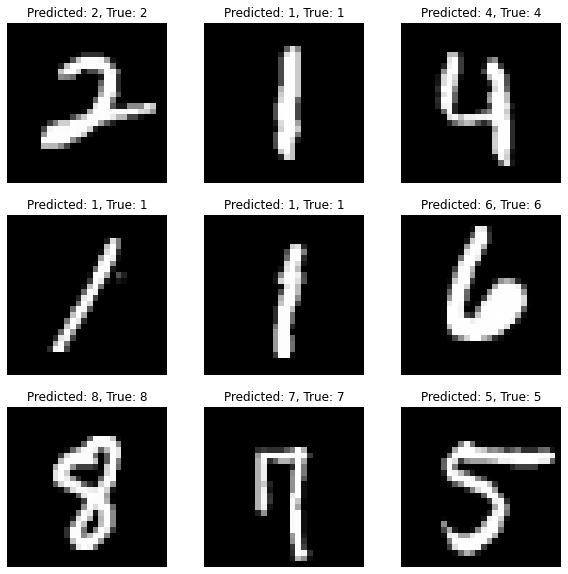

In [16]:
plot_random_predictions(model, X_test, y_test)